## DSC 540
### Term Paper

**Author:** Kimberly Cable

**Semester:** Summer, 2022

## Milestone 1

### About

National Parks in the United States are a favorite vacation destination for many outdoor enthusiasts.  I would like to find out which of the National Parks is best to visit and hike. 

### Plan of Attack

Each of the three data sources has its own unique information but also some overlap.  The National Parks API has all information about each of the national parks in its system. The National Parks Trails CSV is derived from the AllTrails website and has information on the trails located in the National Parks. The National Parks elevation table from Wikipedia is a table of the highest and lowest elevations in 63 National Parks.
Initially. looking at the data for each source, the National Parks API looks to be the parent as it has the most accurate information coming directly from the National Parks Service. I will be using the park’s endpoint to get data about all the National Parks in its database. The CSV file contains the name of the National Park which I will use to connect it to the API data.  The website also has the National Park name which will connect to the API data.

I do not see any major ethical implications for my study.  It is looking at trails in the National  Parks.  It does have information such as user rankings and popularity ranks.  These can be very subjective and what one person likes in a trail is not always what another person likes.

Some of the challenges I see, is the National Park name may be misspelled or spelled differently in each data source.  Also, there is also duplicate information that needs to be consolidated. Many of the fields need to be converted to their appropriate type and checked for empty cells and the website has data that looks different in some of the columns which will need to be fixed.


## Data Sources

* National Park Service API
    1. This API has information about each of the National Parks in the United States.  Information such as facilities, locations, activities, descriptions, etc.
    2. https://www.nps.gov/subjects/developer/api-documentation.htm
* National Park Trails – CSV file
    1. List of trails in the National Parks. Information such as trail names, which National Park it is in, elevation, difficulty, etc.
    2. https://www.kaggle.com/datasets/planejane/national-park-trails
* Website: List of national parks of the United States by elevation
    1. Wikipedia page of the highest and lowest points in each of the United States National Parks.
    2. https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States_by_elevation


### Relationships

* API: Contains json data per National Park.  
    1. Key: data.fullName
* CSV file: Contains 1 row per trail
    1. Key: Column Name: area_name
* Website: Contains 1 row per national park
    1. Key: Column Name: Park
* All Three:
    1. All related by National Park name
    2. API to CSV has a 1 to many relationship with fullName to area_name as key
    3. API to Website has 1 to 1 relationship with fullName to name.

### Data Dictionary

#### National Park Trails - CSV file
#### (18 columns x 3313 rows)

| Column | Description |
|--------|-------------|
| trail_id | Unique trail id |
| name | Name of the trail |
| area_name | Name of the National Park trail is located |
| city_name | Name of the city the trail is located |
| state_name | Name of the state the trail is located |
| country_name | Name of the country the trail is located |
| _geoloc | Latitude and longitude (key-value) of the trails location |
| popularity | Popularity (%) of the trail |
| length | Length in feet of the trail |
| elevation_gain | Elevation gain of the trail |
| difficulty_rating | Difficulty rating (1 – 5) of the trail |
| route_type | Route type: out and back, loop, point to point |
| visitor_usage | Visitor usage rating: light, moderate, heavy |
| avg_rating | Average rating (1 to 5) – can be ½ stars |
| num_reviews | Number of reviews |
| features | Array of features the trail has |
| activities | Array of the activities a trail has |
| units | Units: i or m |


#### List of national parks of the United States by elevation (Wikipedia Website)
#### (9 columns x 63 rows)

| Column | Description |
|--------|-------------|
| Rank | Rank of national park in terms of highest elevation |
| Park | Name of National Park |
| Location | Image of State Flag. \<img alt\> has name of state, can be multiple states |
| Peak name | Name of the highest peak – can be a sentence and has annotations |
| Mountain Range | Name of the Mountain Range of peak |
| Elevation | Elevation of the highest peak in feet and meters |
| Location of lowest point | Name of the lowest elevation point |
| Minimum elevation | Lowest elevation in feet and meters |
| Vertical relief | Vertical feet and meters |

#### National Parks  API (API: json data)
#### (466 rows)

In [1]:
%%capture
'''
Example Response:

{
    "total": "466",
    "limit": "600",
    "start": "0",
    "data": [
        {
            "id": "77E0D7F0-1942-494A-ACE2-9004D2BDC59E",
            "url": "https://www.nps.gov/abli/index.htm",
            "fullName": "Abraham Lincoln Birthplace National Historical Park",
            "parkCode": "abli",
            "description": "For over a century people from around the world have come to rural Central Kentucky to honor the humble beginnings of our 16th president, Abraham Lincoln. His early life on Kentucky's frontier shaped his character and prepared him to lead the nation through Civil War. The country's first memorial to Lincoln, built with donations from young and old, enshrines the symbolic birthplace cabin.",
            "latitude": "37.5858662",
            "longitude": "-85.67330523",
            "latLong": "lat:37.5858662, long:-85.67330523",
            "activities": [
                {
                    "id": "13A57703-BB1A-41A2-94B8-53B692EB7238",
                    "name": "Astronomy"
                },
                {
                    "id": "D37A0003-8317-4F04-8FB0-4CF0A272E195",
                    "name": "Stargazing"
                }
            ],
            "topics": [
                {
                    "id": "D10852A3-443C-4743-A5FA-6DD6D2A054B3",
                    "name": "Birthplace"
                },
                {
                    "id": "F669BC40-BDC4-41C0-9ACE-B2CD25373045",
                    "name": "Presidents"
                }
            ],
            "states": "KY",
            "contacts": {
                "phoneNumbers": [
                    {
                        "phoneNumber": "2703583137",
                        "description": "",
                        "extension": "",
                        "type": "Voice"
                    },
                    {
                        "phoneNumber": "2703583874",
                        "description": "",
                        "extension": "",
                        "type": "Fax"
                    }
                ],
                "emailAddresses": [
                    {
                        "description": "",
                        "emailAddress": "ABLI_Administration@nps.gov"
                    }
                ]
            },
            "entranceFees": [
                {
                    "cost": "0.00",
                    "description": "There is no fee associated with visiting either unit of the park.",
                    "title": "Fee Free Park"
                }
            ],
            "entrancePasses": [],
            "fees": [],
            "directionsInfo": "The Birthplace Unit of the park is located approximately 2 miles south of the town of Hodgenville on U.S. Highway 31E South. The Boyhood Home Unit at Knob Creek is located approximately 10 miles northeast of the Birthplace Unit of the park.",
            "directionsUrl": "http://www.nps.gov/abli/planyourvisit/directions.htm",
            "operatingHours": [
                {
                    "exceptions": [
                        {
                            "exceptionHours": {},
                            "startDate": "2022-11-24",
                            "name": "Park is Closed",
                            "endDate": "2022-11-24"
                        },
                        {
                            "exceptionHours": {},
                            "startDate": "2022-12-26",
                            "name": "Park is Closed",
                            "endDate": "2022-12-26"
                        },
                        {
                            "exceptionHours": {},
                            "startDate": "2023-01-02",
                            "name": "Park is Closed",
                            "endDate": "2023-01-02"
                        }
                    ],
                    "description": "The Memorial Building is open 9:00 am - 4:30 pm eastern time with a limited viewing area.  The Visitor Center and grounds of the Birthplace Unit are open 9:00 am - 5:00 pm eastern time with one-way traffic flow and social distancing.\n\n\nThe Boyhood Home Unit at Knob Creek grounds are open daily sunup to sundown. The buildings are closed for the winter.",
                    "standardHours": {
                        "wednesday": "9:00AM - 5:00PM",
                        "monday": "9:00AM - 5:00PM",
                        "thursday": "9:00AM - 5:00PM",
                        "sunday": "9:00AM - 5:00PM",
                        "tuesday": "9:00AM - 5:00PM",
                        "friday": "9:00AM - 5:00PM",
                        "saturday": "9:00AM - 5:00PM"
                    },
                    "name": "Abraham Lincoln Birthplace National Historical Park"
                }
            ],
            "addresses": [
                {
                    "postalCode": "42748",
                    "city": "Hodgenville",
                    "stateCode": "KY",
                    "line1": "2995 Lincoln Farm Road",
                    "type": "Physical",
                    "line3": "",
                    "line2": ""
                },
                {
                    "postalCode": "42748",
                    "city": "Hodgenville",
                    "stateCode": "KY",
                    "line1": "2995 Lincoln Farm Road",
                    "type": "Mailing",
                    "line3": "",
                    "line2": ""
                }
            ],
            "images": [
                {
                    "credit": "NPS Photo",
                    "title": "The Memorial Building with fall colors",
                    "altText": "The Memorial Building surrounded by fall colors",
                    "caption": "Over 200,000 people a year come to walk up the steps of the Memorial Building to visit the site where Abraham Lincoln was born",
                    "url": "https://www.nps.gov/common/uploads/structured_data/3C861078-1DD8-B71B-0B774A242EF6A706.jpg"
                },
                {
                    "credit": "NPS Photo",
                    "title": "The Memorial Building",
                    "altText": "The first memorial erected to honor Abraham Lincoln",
                    "caption": "The Memorial Building constructed on the traditional site of the birth of Abraham Lincoln.",
                    "url": "https://www.nps.gov/common/uploads/structured_data/3C861263-1DD8-B71B-0B71EF9B95F9644F.jpg"
                }
            ],
            "weatherInfo": "There are four distinct seasons in Central Kentucky. However, temperature and weather conditions can vary widely within those seasons. Spring and Fall are generally pleasant with frequent rain showers. Summer is usually hot and humid. Winter is moderately cold with mixed precipitation.",
            "name": "Abraham Lincoln Birthplace",
            "designation": "National Historical Park"
        }
'''

## Milestone 2

In [29]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Cleaning/Formatting Flat File Source

Perform at least 5 data transformation and/or cleansing steps to your flat file data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformation. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [3]:
# Read data file
try:
    trails_df = pd.read_csv("AllTrails data - nationalpark.csv")
except Exception:
    print("There was an error reading the Trails file")
    
trails_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [4]:
trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

In [5]:
# Check empty values
trails_df.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [6]:
# Check descriptive statistics
trails_df.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [7]:
# Create a copy of dataframe for cleaned
trails_cleaned = trails_df

### Step 1: Correct Maui being a state

Change Maui as a state to Hawaii as the state and United States as the country

In [8]:
# Correct the Country from Hawaii to United States
trails_cleaned['country_name'] = trails_cleaned['country_name'].apply(lambda x: x.replace("Hawaii", "United States"))

# Correct the state from Maui to Hawaii
trails_cleaned['state_name'] = trails_cleaned['state_name'].apply(lambda x: x.replace("Maui", "Hawaii"))

In [9]:
trails_cleaned.loc[trails_df['state_name'] == 'Hawaii'].head(2)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3264,10010442,Kilauea Iki Trail and Crater Rim Trail,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.41648, 'lng': -155.24294}",25.6723,4828.02,209.7024,3,loop,3.0,4.5,473,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['hiking', 'nature-trips', 'walking']",m
3265,10266617,Kalapana Lava Viewing,Hawaii Volcanoes National Park,Pahoa,Hawaii,United States,"{'lat': 19.3557, 'lng': -154.98677}",11.3437,15288.73,196.9008,1,out and back,3.0,4.5,57,"['rails-trails', 'dogs-no', 'hot-springs', 'vi...","['birding', 'hiking', 'mountain-biking', 'natu...",m


### Step 2: Change length to feet

Convert meters to feet and convert inches to feet in the length column

In [10]:
# Function to convert length to feet
def convert (units, length):
    """ 
    Convert meters and inches to feet
    
    Args:
        units (string): i or m
        length (float): length
        
    Returns:
        length (float): length in inches
    """
    if units == 'm':
        length_feet = length * 39.3701 * 0.08333
    else:
        length_feet = length * 0.08333
    
    return length_feet

In [11]:
# Create new length column in feet
trails_cleaned['length_feet'] = trails_cleaned.apply(lambda item: convert(units = item['units'], length = item['length']), axis = 1)

# Drop length column
trails_cleaned.drop(['length'], axis = 1, inplace = True)

# Drop units column
trails_cleaned.drop(['units'], axis = 1, inplace = True)

In [12]:
trails_cleaned.head(2)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099


### Step 3: Split out Latitude and Longitude

Take the _geoloc column and split out latitude and longitude into two separate columns

In [13]:
# Split _geoloc by ','
trails_cleaned[['lat','lon']] = trails_cleaned['_geoloc'].apply(lambda x: pd.Series(str(x).split(",")))

# Split lat by ':' and keep only numeric
trails_cleaned['lat'] = trails_cleaned['lat'].apply(lambda x: (x.split(':')[1].split()[-1])).astype(float)

# Split lon by ':' and keep only numeric
trails_cleaned['lon'] = trails_cleaned['lon'].apply(lambda x: (x.split(':')[1].split()[-1][:-1])).astype(float)

# Drop _geoloc column
trails_cleaned.drop(['_geoloc'], axis = 1, inplace = True)

In [14]:
trails_cleaned.head(2)

,trail_id,name,area_name,city_name,state_name,country_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968


### Step 4: Drop Country Name

Since all of the trails are in the United States, we do not need to country_name column

In [15]:
# Drop country_name column
trails_cleaned.drop(['country_name'], axis = 1, inplace = True)

In [16]:
trails_cleaned.head()

,trail_id,name,area_name,city_name,state_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 5:  Drop trail id

The trail id is not needed so we can drop it

In [17]:
# Drop trail_id column
trails_cleaned.drop(['trail_id'], axis = 1, inplace = True)

In [18]:
trails_cleaned.head()

,name,area_name,city_name,state_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 6: Rename Headers

Rename name, area_name, city_name, and state_name headers to trail, national_park, city, and state respectively

In [19]:
header_names = {'name': 'trail',
                'area_name': 'national_park',
                'city_name': 'city',
                'state_name': 'state'}

trails_cleaned.rename(columns = header_names, inplace = True)
trails_cleaned.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 7: Fill Visitor Usage empty values

Fill visitor usage with 0\'s where its empty.

In [20]:
trails_cleaned.fillna({'visitor_usage': 0}, inplace=True)

In [21]:
# Check empty values
trails_cleaned.isnull().sum()

trail                0
national_park        0
city                 0
state                0
popularity           0
elevation_gain       0
difficulty_rating    0
route_type           0
visitor_usage        0
avg_rating           0
num_reviews          0
features             0
activities           0
length_feet          0
lat                  0
lon                  0
dtype: int64

### Step 8: Check for duplicate trails

Drop trail names that are duplicated and keep the first one

In [23]:
# Check duplicate trail names
trails_cleaned.trail.value_counts().loc[lambda x: x > 1]

Black Canyon Trail                         3
Porcupine Wash Ruby Lee Mill Site Trail    2
Camp Ridge Trail                           2
Tenaya Lake Trail                          2
Shafer Trail                               2
Irely Lake Trail                           2
Bubbs Creek Trail                          2
Redwood Creek Trail                        2
Dege Peak Trail                            2
White Wolf to Aspen Valley Trail           2
Dream Lake Trail                           2
Artist Point Trail                         2
Hidden Falls Trail                         2
Rainbow Falls Trail                        2
Petrified Forest Trail                     2
Furnace Mountain Trail                     2
The Window Trail                           2
Horseshoe Lake Trail                       2
Eagle Peak Trail                           2
Clear Creek Trail                          2
Mills Lake via Glacier Gorge Trail         2
Dewey Point Trail                          2
Inspiratio

In [24]:
trails_cleaned.drop_duplicates(['trail'], keep = 'first', inplace = True)

In [25]:
# Check duplicate trail names
trails_cleaned.trail.value_counts().loc[lambda x: x > 1]

Series([], Name: trail, dtype: int64)

### Step 9: Check for Outliers

In [26]:
trails_cleaned.describe()

,popularity,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000
mean,8.942925,644.001148,3.170316,1.734793,4.175943,69.999696,2054.575759,39.667923,-106.358433
std,8.106746,904.000924,1.706180,0.830792,0.941629,183.276936,6766.419638,5.880684,17.787031
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.086090,-156.253570
25%,3.795675,116.738400,1.000000,1.000000,4.000000,5.000000,388.908276,36.331835,-118.771357
50%,6.576950,360.883200,3.000000,2.000000,4.500000,17.000000,925.333485,38.467545,-110.801925
75%,11.253875,838.352400,5.000000,2.000000,4.500000,56.250000,1850.666970,44.320425,-93.137997
max,84.622900,14029.944000,7.000000,4.000000,5.000000,3903.000000,190600.004870,63.883740,-68.036790


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'elevation_gain'}>,
        <AxesSubplot:title={'center':'difficulty_rating'}>],
       [<AxesSubplot:title={'center':'visitor_usage'}>,
        <AxesSubplot:title={'center':'avg_rating'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'length_feet'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>]], dtype=object)

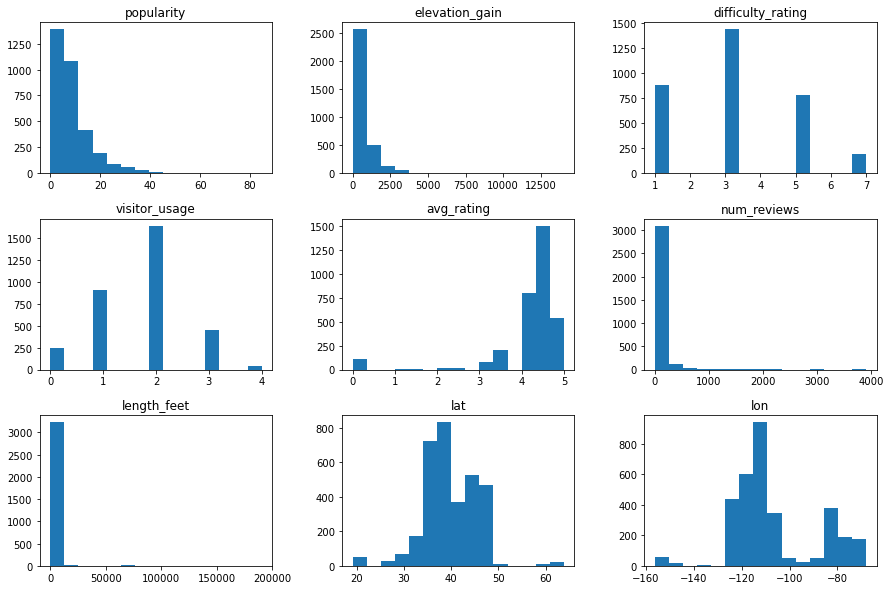

In [27]:
# Create histogram of numeric columns in dataset
trails_cleaned.hist(bins = 15, figsize = (15, 10), grid = False)

In [32]:
def findOutliers_IQR(df):
    '''
    Find Outliers in the dataframe
    
    args:
        df (dataframe)
        
    return:
        outliers (dataframe)
    '''
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = df[((df <= lower_bound) | (df >= upper_bound))]
    
    return outliers

In [33]:
outliers = findOutliers_IQR(trails_cleaned['popularity'])
print("Popularity")
print(f"Number of outliers: {str(len(outliers))}")
print(f"Max outlier: {str(outliers.max())}")
print(f"Min outlier: {str(outliers.min())}")

print(f"Outliers are: \n{outliers}")

Popularity
Number of outliers: 207
Max outlier: 84.6229
Min outlier: 22.4857
Outliers are: 
0       24.8931
29      37.4791
30      36.2709
31      33.2560
32      31.6323
         ...   
2965    23.2571
2966    22.9440
3264    25.6723
3299    33.3147
3300    23.5557
Name: popularity, Length: 207, dtype: float64


In [34]:
outliers = findOutliers_IQR(trails_cleaned['elevation_gain'])
print("Elevation Gain")
print(f"Number of outliers: {str(len(outliers))}")
print(f"Max outlier: {str(outliers.max())}")
print(f"Min outlier: {str(outliers.min())}")

print(f"Outliers are: \n{outliers}")

Elevation Gain
Number of outliers: 207
Max outlier: 14029.944
Min outlier: 1920.8496
Outliers are: 
62      2092.7568
70      3578.9616
77      2213.7624
78      1995.8304
98      1966.8744
          ...    
3194    2160.7272
3198    2051.9136
3219    2622.8040
3226    2793.7968
3278    2219.8584
Name: elevation_gain, Length: 207, dtype: float64


In [35]:
outliers = findOutliers_IQR(trails_cleaned['avg_rating'])
print("Average Rating")
print(f"Number of outliers: {str(len(outliers))}")
print(f"Max outlier: {str(outliers.max())}")
print(f"Min outlier: {str(outliers.min())}")

print(f"Outliers are: \n{outliers}")

Average Rating
Number of outliers: 232
Max outlier: 3.0
Min outlier: 0.0
Outliers are: 
21      3.0
22      3.0
24      3.0
26      0.0
138     3.0
       ... 
3254    0.0
3256    0.0
3260    0.0
3262    2.5
3292    0.0
Name: avg_rating, Length: 232, dtype: float64


In [36]:
outliers = findOutliers_IQR(trails_cleaned['num_reviews'])
print("Number of Reviews")
print(f"Number of outliers: {str(len(outliers))}")
print(f"Max outlier: {str(outliers.max())}")
print(f"Min outlier: {str(outliers.min())}")

print(f"Outliers are: \n{outliers}")

Number of Reviews
Number of outliers: 392
Max outlier: 3903
Min outlier: 134
Outliers are: 
0       423
1       260
2       224
3       237
29      670
       ... 
3264    473
3294    144
3299    697
3300    355
3301    201
Name: num_reviews, Length: 392, dtype: int64


In [37]:
outliers = findOutliers_IQR(trails_cleaned['length_feet'])
print("Length in Feet")
print(f"Number of outliers: {str(len(outliers))}")
print(f"Max outlier: {str(outliers.max())}")
print(f"Min outlier: {str(outliers.min())}")

print(f"Outliers are: \n{outliers}")

Length in Feet
Number of outliers: 263
Max outlier: 190600.00486961633
Min outlier: 4050.01032644
Outliers are: 
13       5122.860744
70       5484.947760
75       7375.846621
78       4157.295368
105      5256.967046
            ...     
3304    59133.519516
3308    65997.231603
3309    92924.102097
3311    63357.342339
3312    27454.848347
Name: length_feet, Length: 263, dtype: float64
